<a href="https://colab.research.google.com/github/palash-21/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.
#The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. 
#In this problem, we do not have to predict the actual price but a price range indicating how high the price is..




  Data Description :

Battery_power - Total energy a battery can store in one time measured in mAh        

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are on a call

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

In [61]:
# Lets Equip all the tools we would need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore") 

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
path_mob_data_csv = "/content/drive/MyDrive/Colab Notebooks/almabetter pro materials/Capstone Projects/My Capstone Projects/Mobile Price Range Classification/data_mobile_price_range.csv"
mob_df = pd.read_csv(path_mob_data_csv)

In [64]:
# To display all columns
pd.set_option('display.max_columns', None)

In [65]:
# Taking a glance on the datasets
print("no of observations & no of features", mob_df.shape)
mob_df.head()

no of observations & no of features (2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [66]:
mob_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Great!!! We dont have any nulls and the date type also looks correct

In [67]:
mob_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


*   This dataset seems older as the specifications of mobiles are not from recent technologies like max 2000mah battery, 4gb ram,etc. 
*   There are some zeroes in the dataset. 

In [68]:
# Front and primary camera may have zero indicating no camera 
# but its highly unlikely to have only front camera and no primary camera, lets check
mob_df[mob_df['pc']==0]['fc'].value_counts()

0    101
Name: fc, dtype: int64

This looks okay!!

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1481           1834     0          2.1         0   7       1          40   
1933            897     1          2.0         0   3       1           2   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
1481    0.1         99        4  11          0      1987  3692    13     0   
1933    0.6        154        8  10          0       994  1958     7     5   

      talk_time  three_g  touch_screen  wifi  price_range  
1481         16        1             1     0            3  
1933          7        1             1     0            1  
indexes: [1481, 1933]
Skewness: 0.6662712560691598


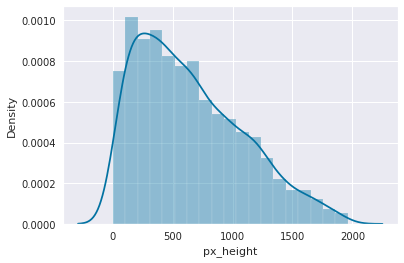

In [69]:
#  Pixel resolution height 
print(mob_df[mob_df['px_height']==0])
indexes = list(mob_df[mob_df['px_height']==0].index)
print('indexes:',indexes)
print('Skewness:', mob_df['px_height'].skew())
sns.distplot(mob_df['px_height'])

In [70]:
# We have two zero entries for pixel height, 
# Also there are entries with very low pixel height
# First we will replace both of these zeros with median
for index in indexes:
  mob_df.loc[index,'px_height']=int(mob_df['px_height'].median())
print(int(mob_df['px_height'].median()))

564


      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
12             1815     0          2.8         0   2       0          33   
24              503     0          1.2         1   5       1           8   
33             1310     1          2.2         1   0       1          51   
42             1253     1          0.5         1   5       1           5   
50             1547     1          3.0         1   2       1          14   
...             ...   ...          ...       ...  ..     ...         ...   
1918            772     0          1.0         1   0       1          23   
1920            591     1          0.5         1   1       1          16   
1946            590     1          1.2         1   0       0          32   
1954            686     1          2.7         1   0       0          36   
1981           1454     0          2.6         0   8       0           6   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
12      0

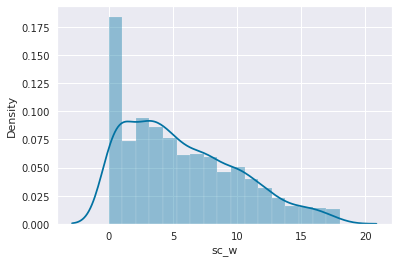

In [71]:
#  Screen width 
print(mob_df[mob_df['sc_w']==0])
indexes = list(mob_df[mob_df['sc_w']==0].index)
print('indexes:',indexes)
print('Skewness:', mob_df['sc_w'].skew())
sns.distplot(mob_df['sc_w'])

In [72]:
# We have 180 entries for zeroes i.e 9% 
# We will group by the price range and replace the 0 value of sc_width
# with the averaege of sc_width based on price_range
# Checking avg screen width vs price range
mob_df.groupby('price_range')['sc_w'].mean().astype(int)

price_range
0    5
1    5
2    5
3    6
Name: sc_w, dtype: int64

In [73]:
# Replacing these zeros with avg width based on price range
mob_df['sc_w'] = mob_df['sc_w'].replace(0, np.nan)
mob_df['sc_w'] = mob_df['sc_w'].fillna(mob_df.groupby('price_range')['sc_w'].transform('mean').astype(int))
mob_df['sc_w'] = mob_df['sc_w'].astype(int)
mob_df[mob_df['sc_w']==0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [74]:
mob_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [75]:
mob_df['ram'].value_counts()

1464    4
3142    4
2610    4
2227    4
1229    4
       ..
2312    1
2167    1
3508    1
297     1
3919    1
Name: ram, Length: 1562, dtype: int64

In [76]:
mob_df['int_memory'].value_counts()

27    47
16    45
14    45
57    42
2     42
      ..
22    24
38    23
62    21
4     20
59    18
Name: int_memory, Length: 63, dtype: int64

RAM generally comes in multiples of 256Mb like 256mb,512mb,1gb,2gb,etc
Similarly, Internal memory also comes in sizes like 1,2,4,8,16,32,64 of GB
But here there are abnormal values for RAM & internal Memory

In [77]:
mob_df['clock_speed'].value_counts()

0.5    413
2.8     85
2.3     78
2.1     76
1.6     76
2.5     74
0.6     74
1.4     70
1.3     68
1.5     67
2.0     67
1.9     65
0.7     64
2.9     62
1.8     62
1.0     61
1.7     60
2.2     59
0.9     58
2.4     58
0.8     58
1.2     56
2.6     55
2.7     55
1.1     51
3.0     28
Name: clock_speed, dtype: int64

# EDA

In [78]:
mob_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.672000,1251.515500,2124.213000,12.306500,6.307000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.318507,432.199447,1084.732044,4.213245,3.961893,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,1.000000,500.000000,256.000000,5.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,284.000000,874.750000,1207.500000,9.000000,3.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,6.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


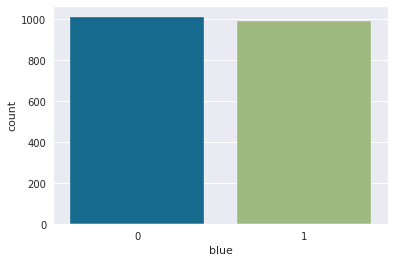

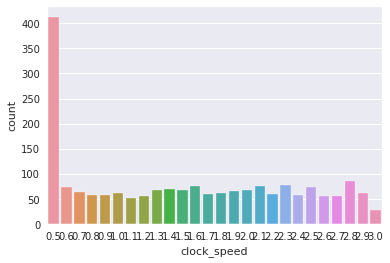

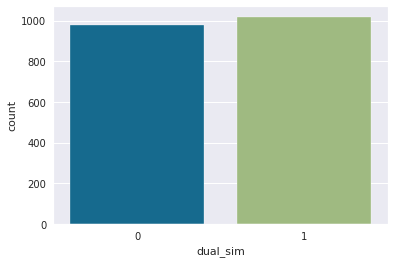

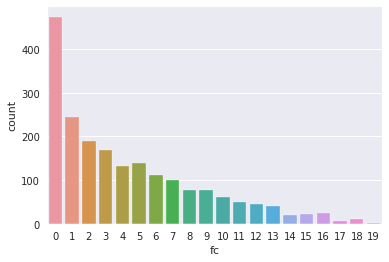

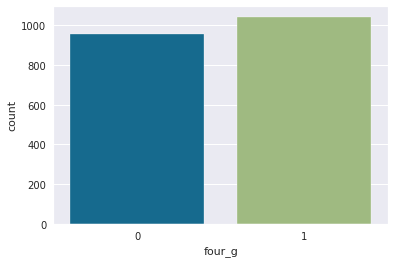

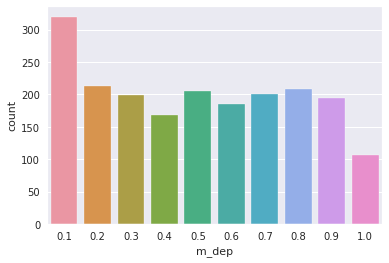

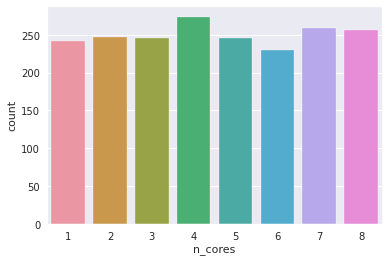

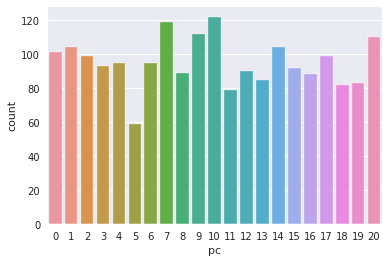

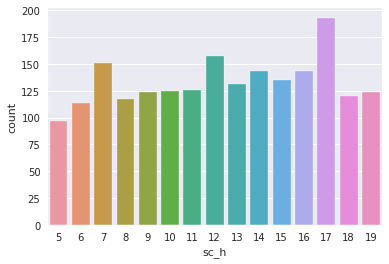

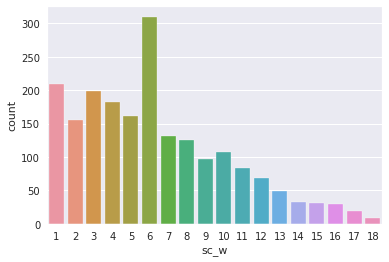

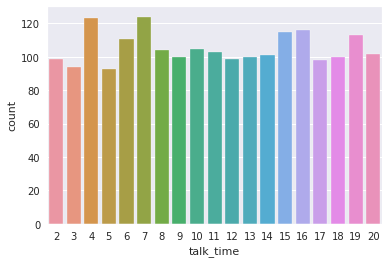

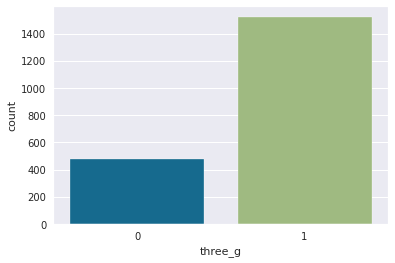

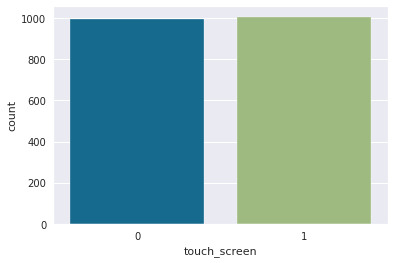

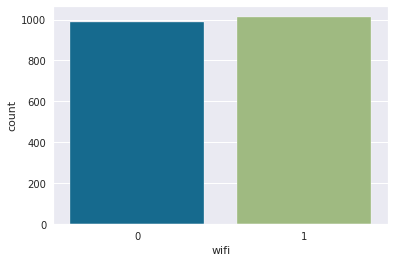

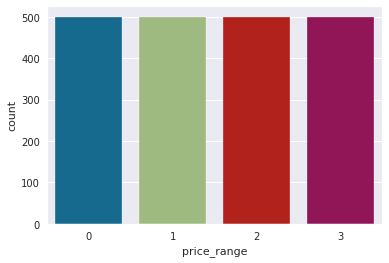

In [79]:
#CountPlot for various columns
for i in mob_df:
    if(mob_df[i].nunique()<30):
        sns.countplot(x=mob_df[i])
        plt.show()

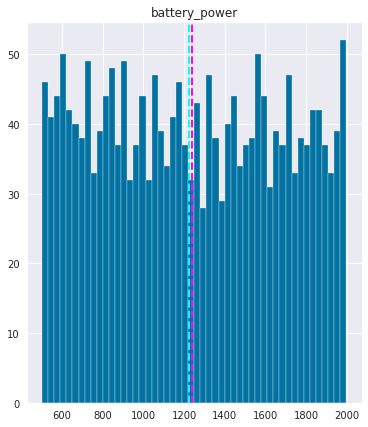

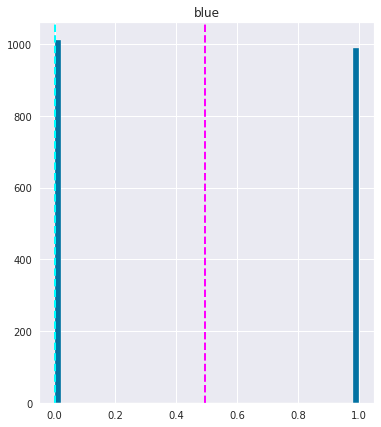

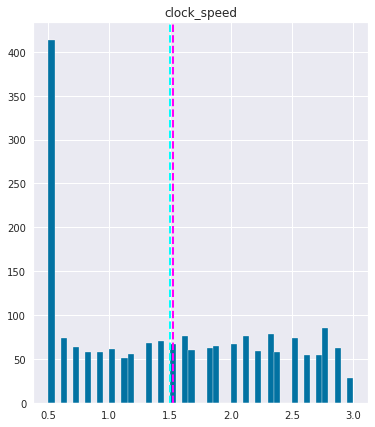

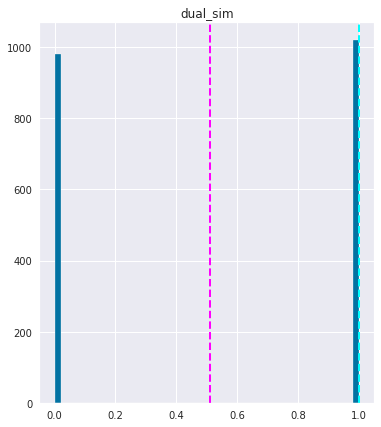

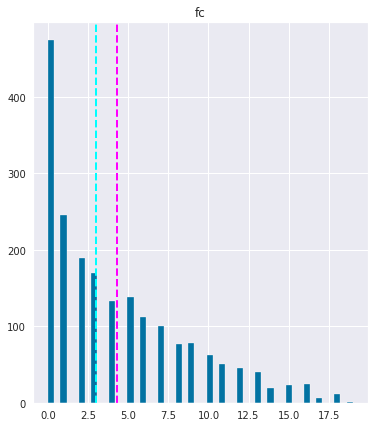

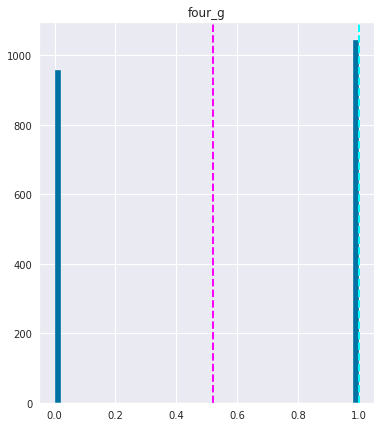

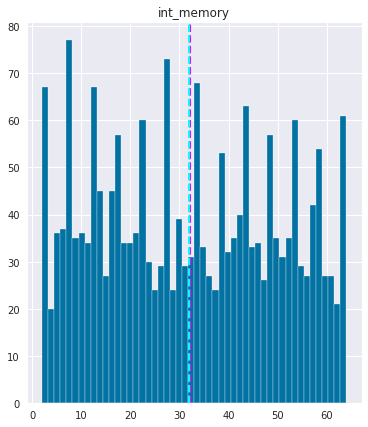

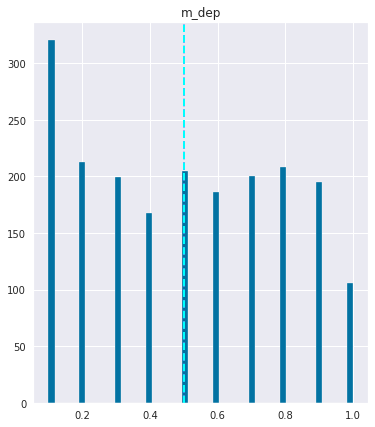

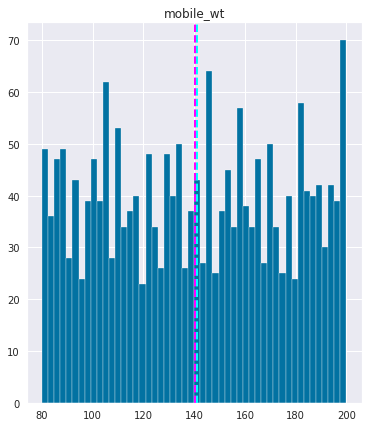

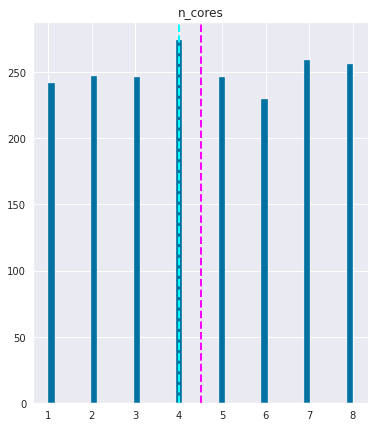

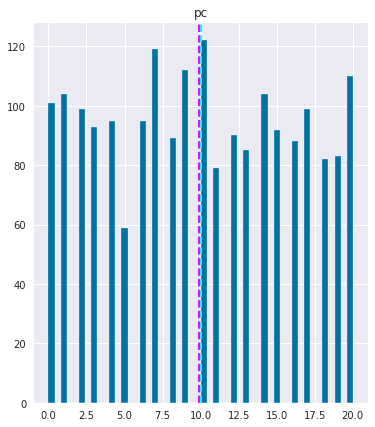

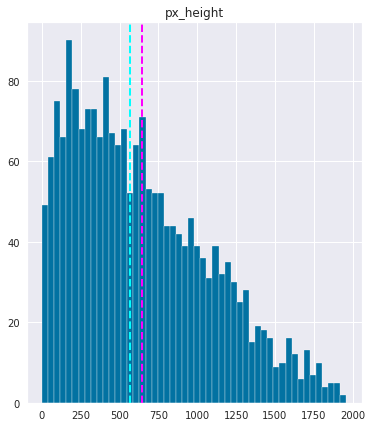

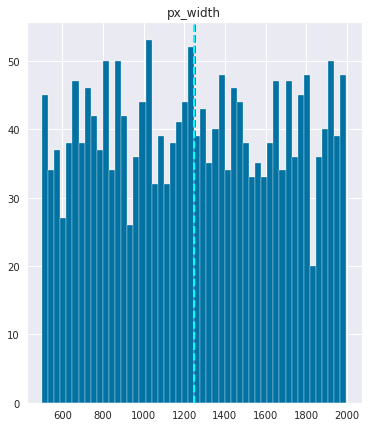

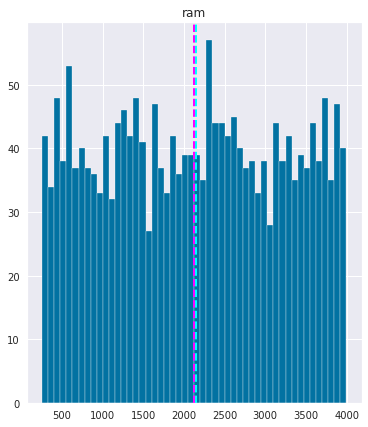

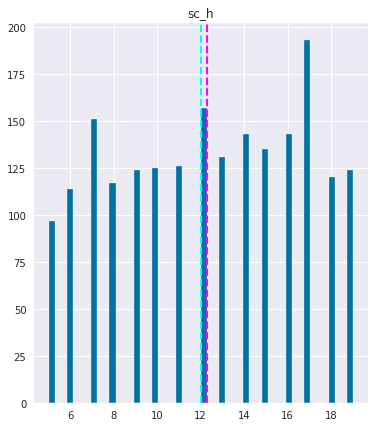

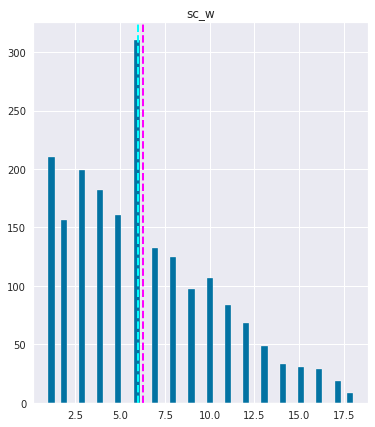

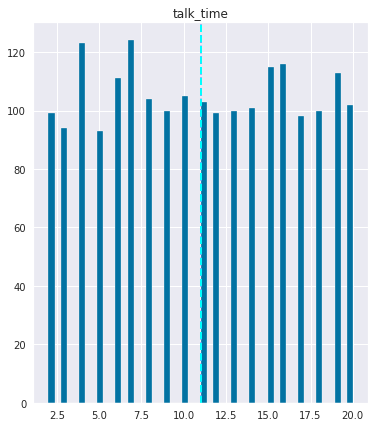

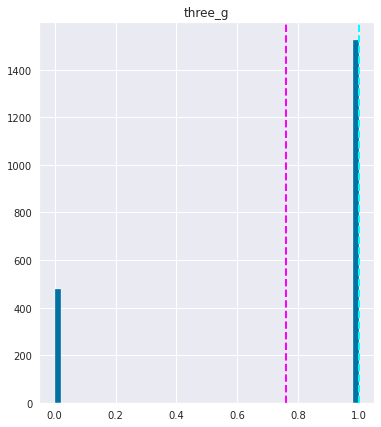

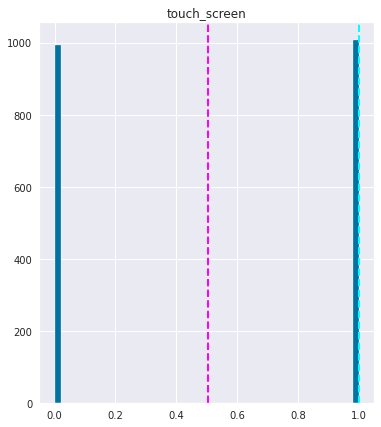

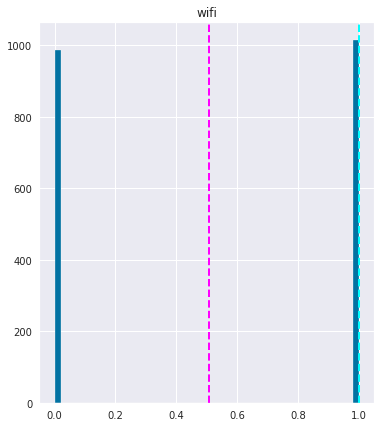

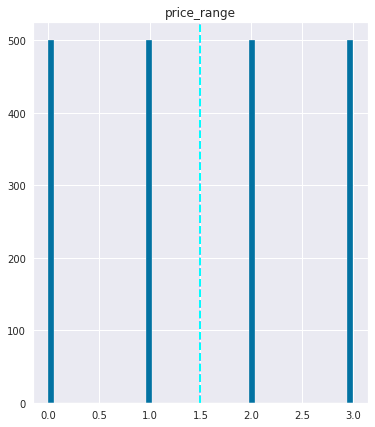

In [80]:
#Distplot for various columns
for col in mob_df.columns:
  figure=plt.figure(figsize=(6,7))
  ax=figure.gca()
  feature = mob_df[col]
  feature.hist(bins=50, ax = ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(col)
plt.show()

Text(0.5, 1.0, 'Correlation ')

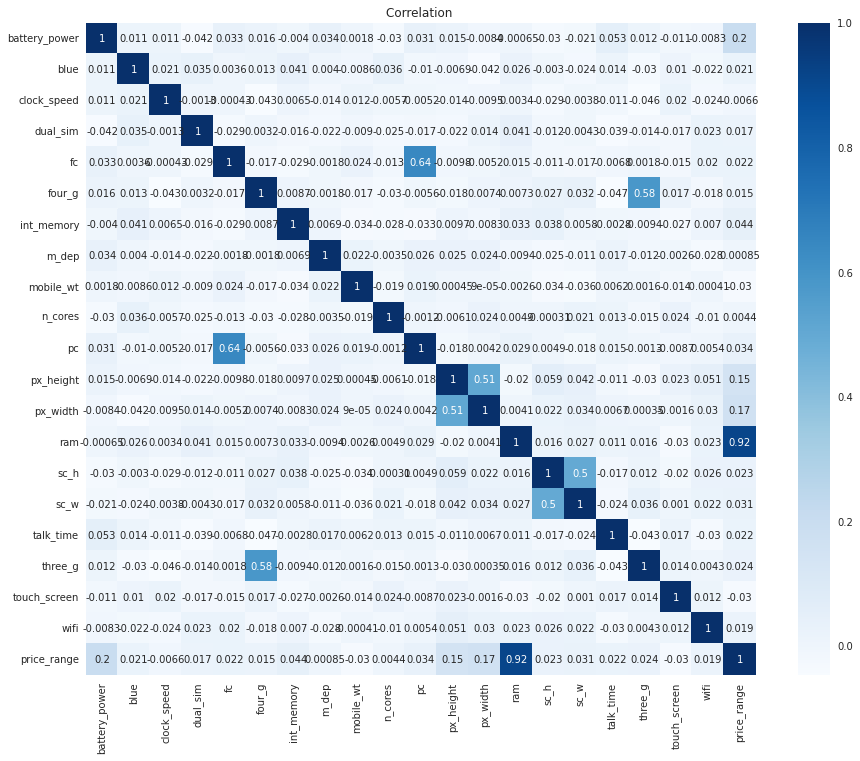

In [81]:
# Correlation heatmap
corr=mob_df.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Blues',annot=True)
r.set_title("Correlation ")

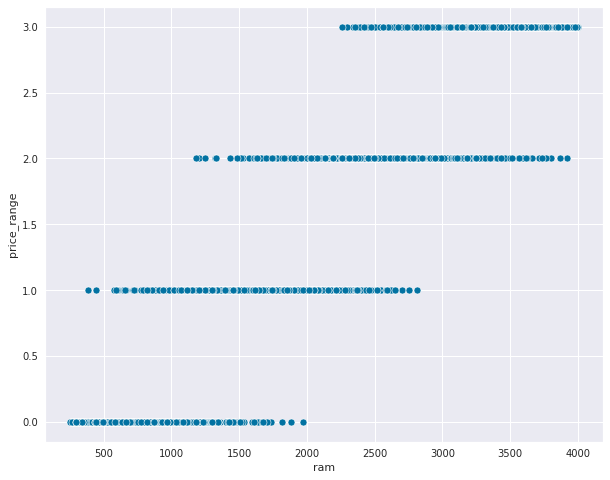

In [82]:
# Check the range of RAM for the four price ranges
plt.figure(figsize=(10,8))
sns.scatterplot(mob_df['ram'],mob_df['price_range'])

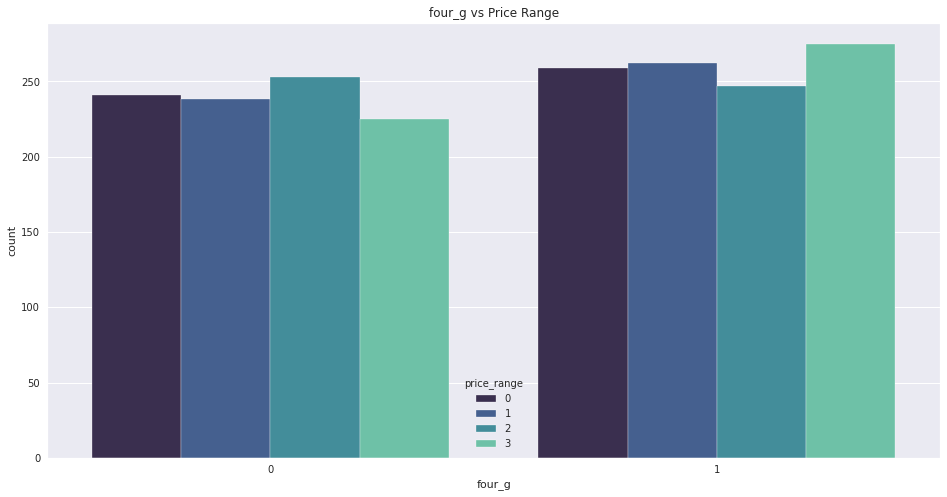

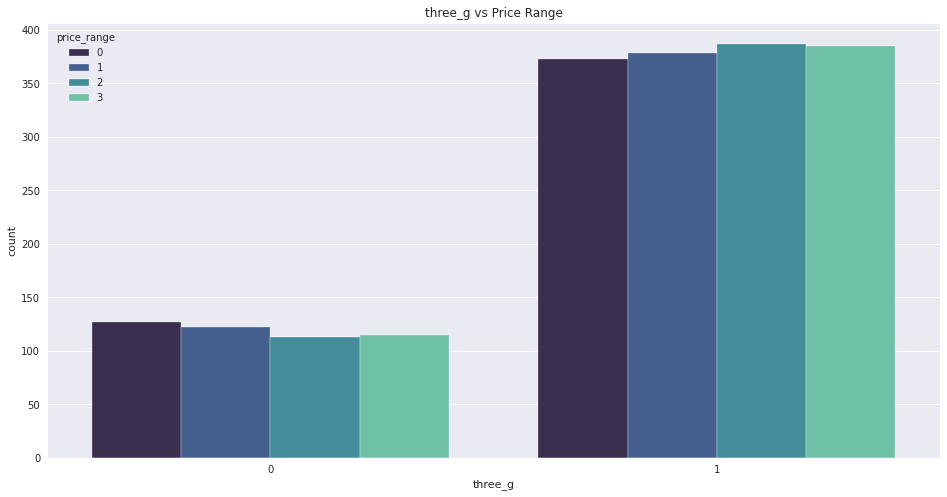

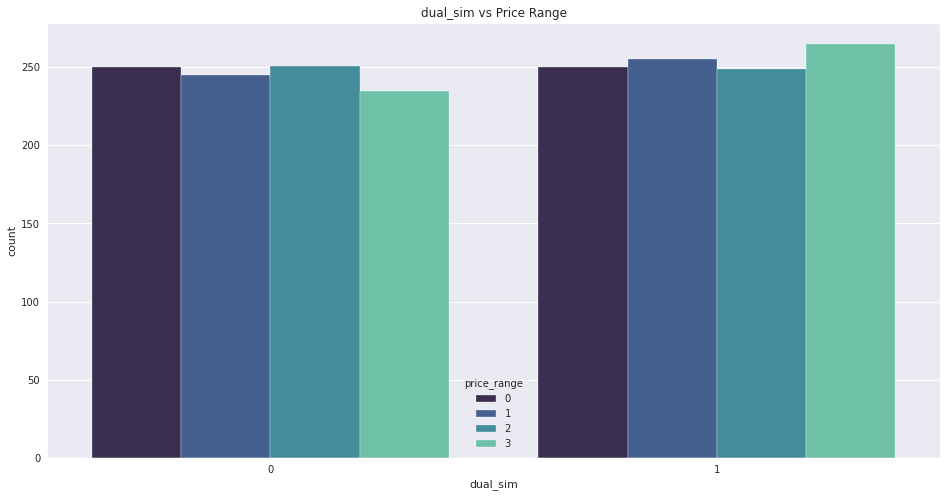

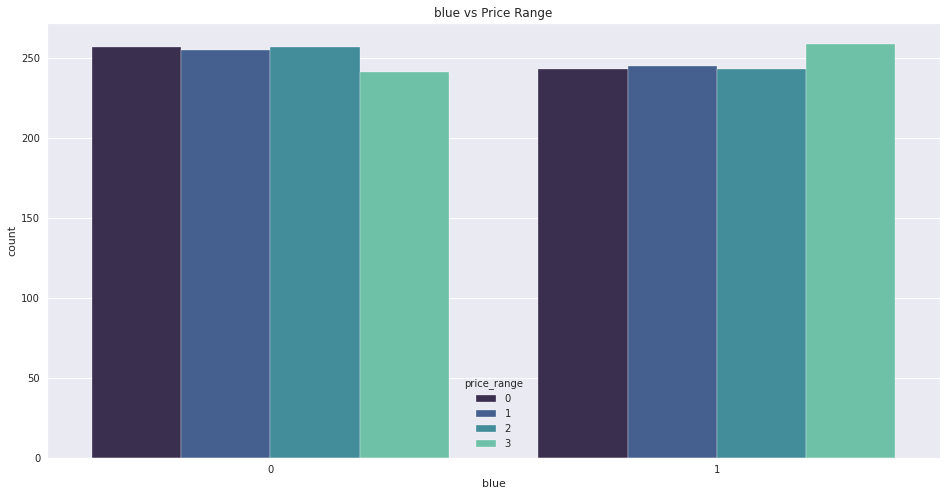

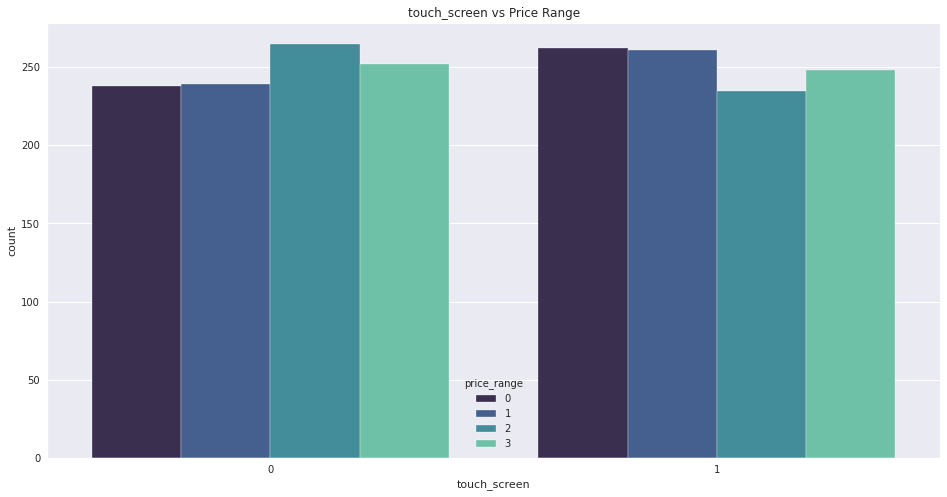

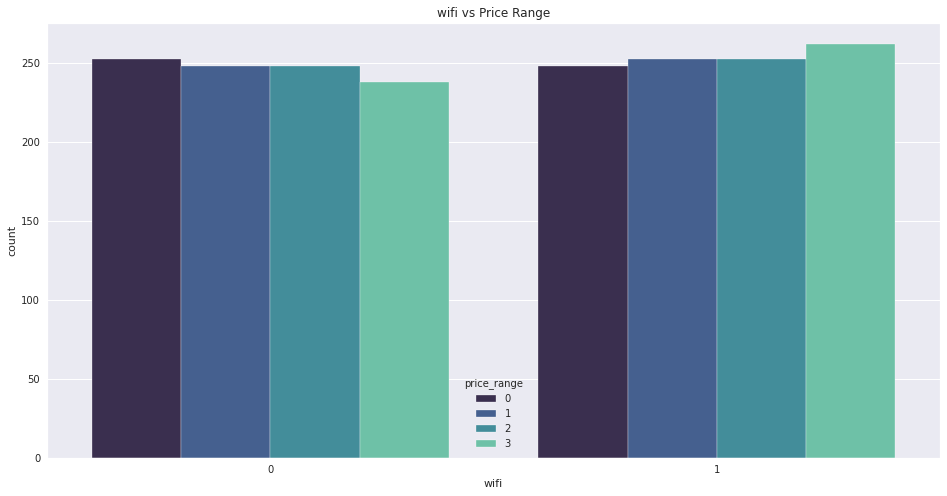

In [83]:
# Comparing binary features with Price Range

for feature in ['four_g','three_g','dual_sim','blue','touch_screen','wifi']:
  plt.figure(figsize = (16, 8))
  plt.title(f'{feature} vs Price Range')
  sns.countplot(mob_df[feature], palette = 'mako', hue = mob_df['price_range'])

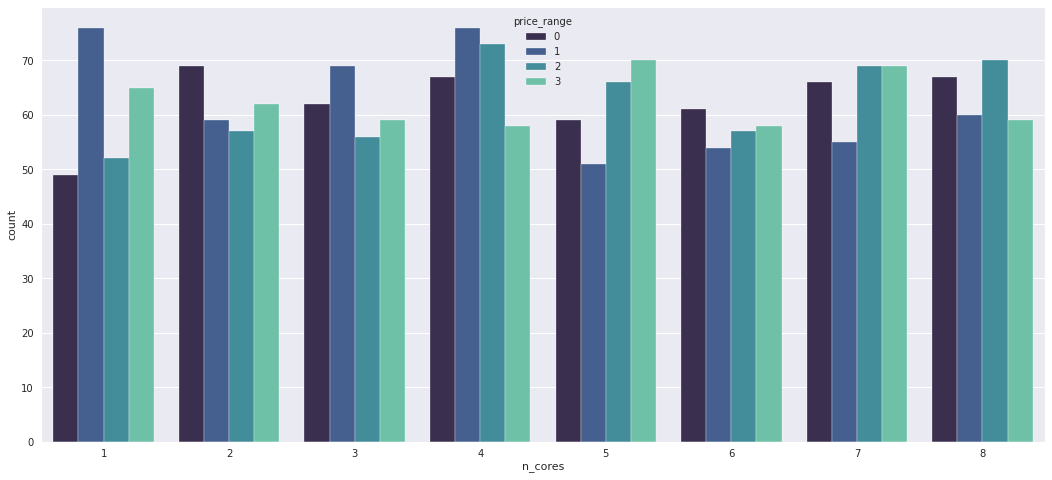

In [84]:
# No of Cores vs Price Range
plt.figure(figsize = (18, 8))
sns.countplot(mob_df['n_cores'], palette = 'mako', hue = mob_df['price_range'])

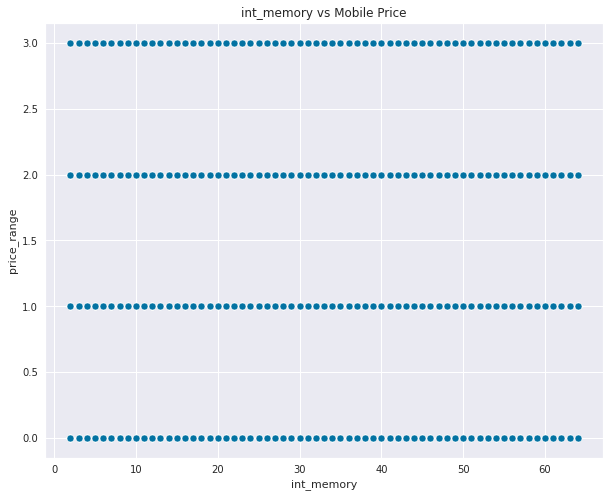

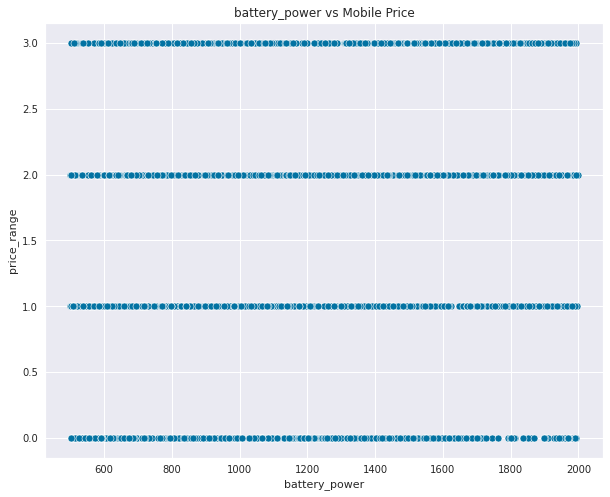

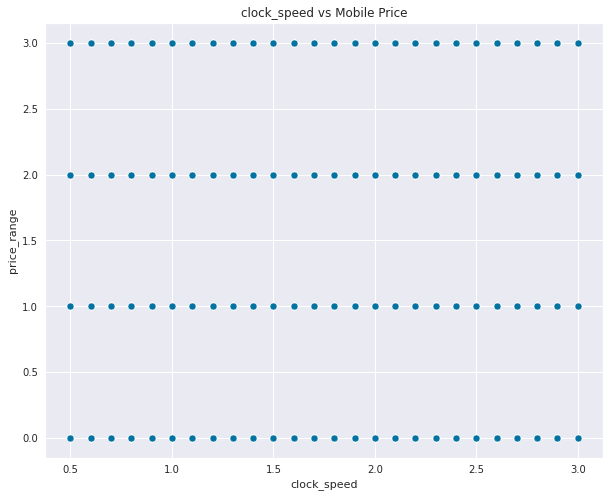

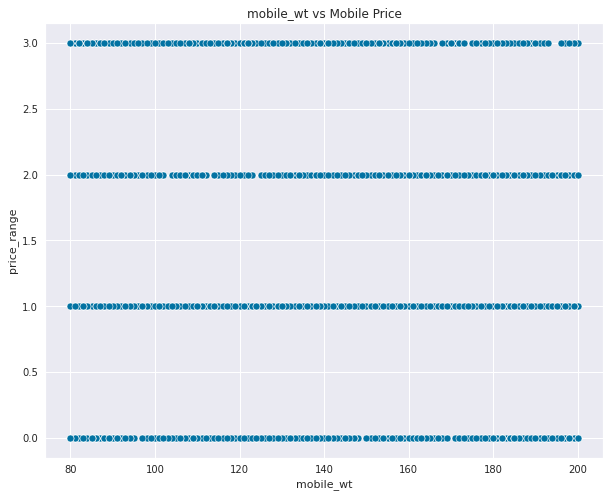

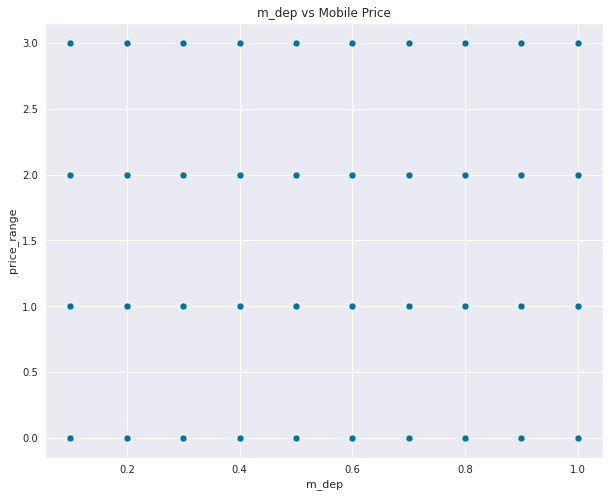

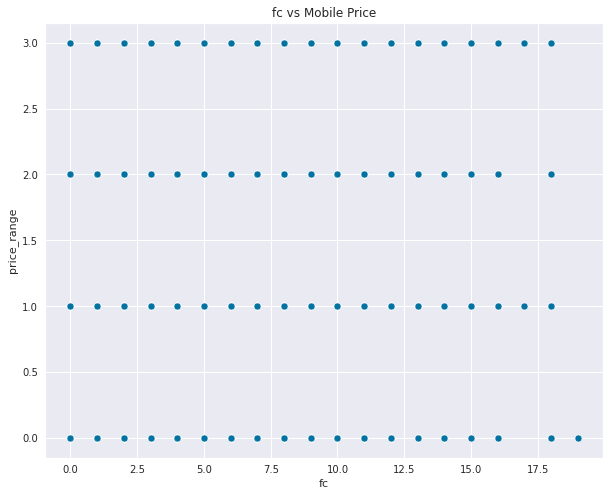

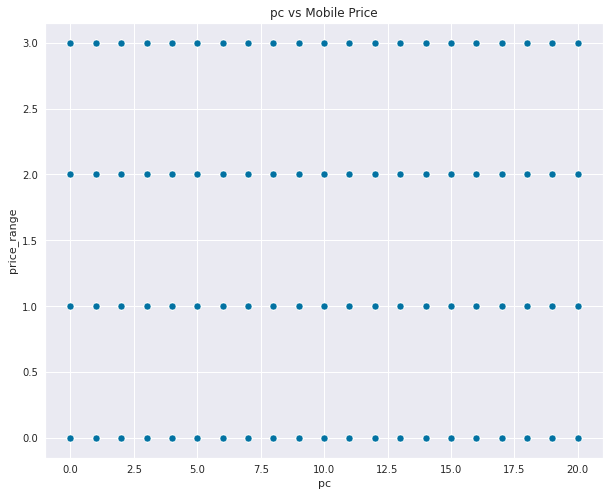

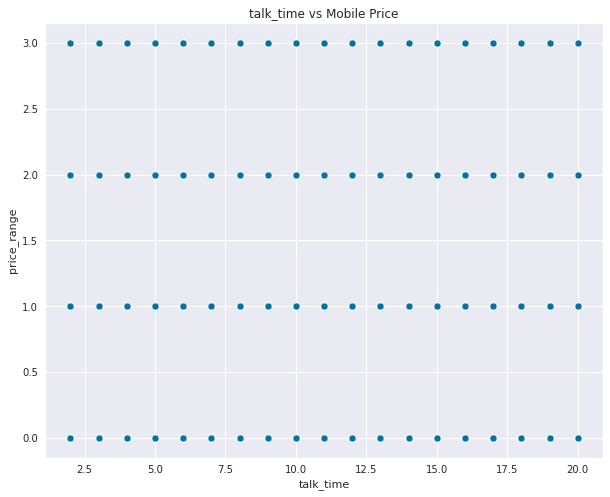

In [85]:
# Scatter plot of imp features with price range

for feature in ['int_memory','battery_power','clock_speed','mobile_wt','m_dep','fc','pc','talk_time']:
  plt.figure(figsize=(10,8))
  plt.title(f'{feature} vs Mobile Price')
  sns.scatterplot(mob_df[feature],mob_df['price_range'])


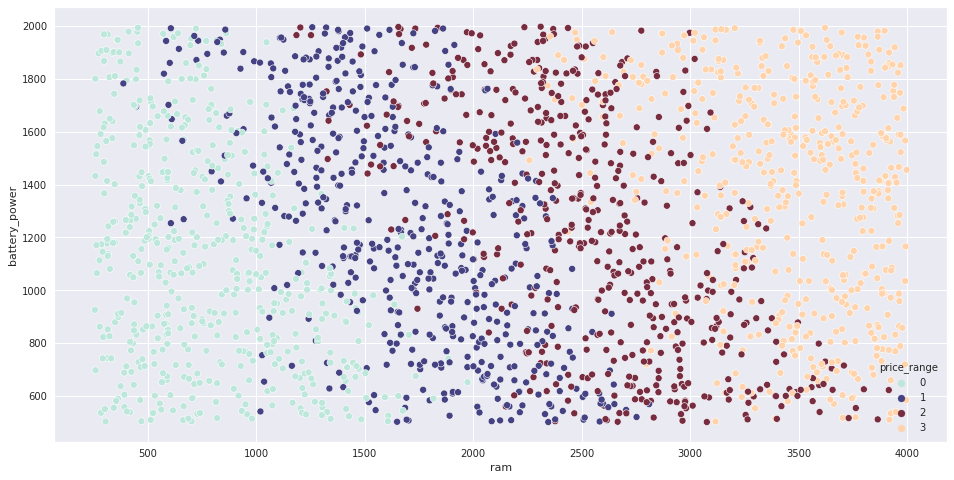

In [86]:
# Battery power vs Ram

plt.figure(figsize = (16, 8))
sns.scatterplot(mob_df['ram'], mob_df['battery_power'], hue = mob_df['price_range'], palette = 'icefire')

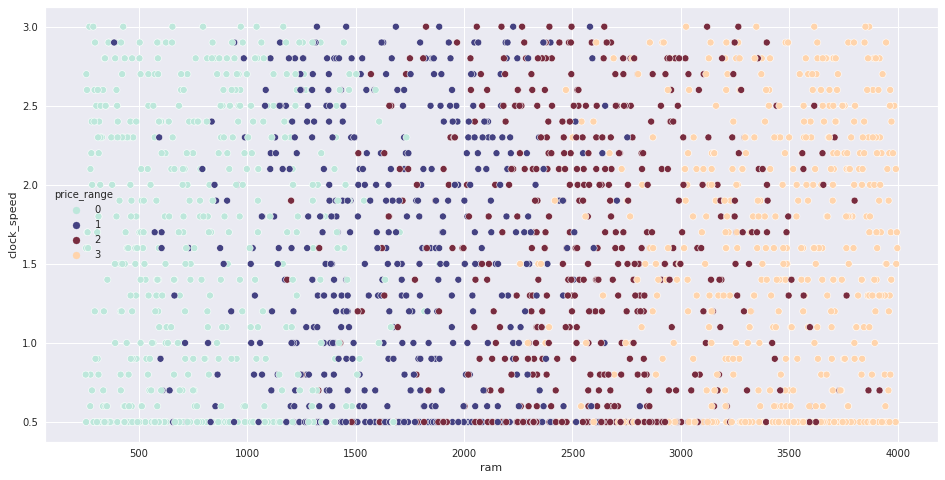

In [87]:
#clock speed and ram

plt.figure(figsize = (16, 8))
sns.scatterplot(mob_df['ram'], mob_df['clock_speed'], hue = mob_df['price_range'], palette = 'icefire')


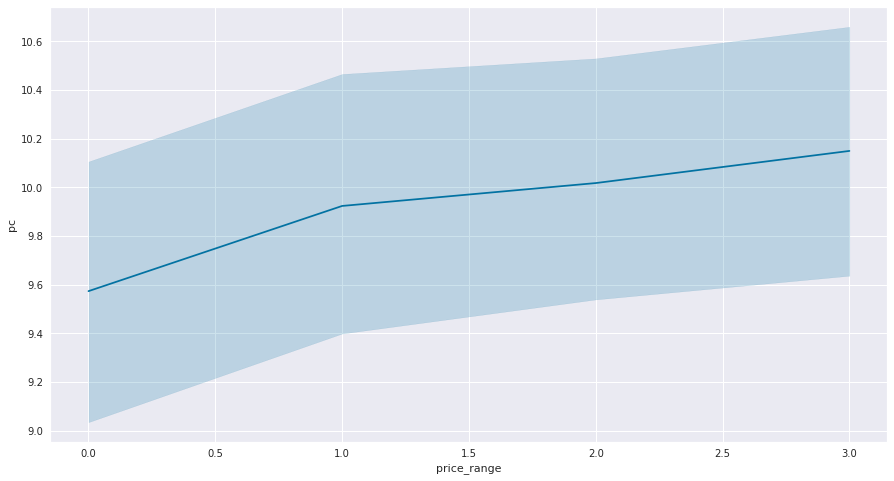

In [88]:
# Front camera vs price range
plt.figure(figsize = (15, 8))
sns.lineplot(mob_df['price_range'], mob_df['pc'], palette = 'mako')
 